<a href="https://colab.research.google.com/github/ajay4198/Hotel-booking-Analysis-/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv')

In [ ]:
# Copy the data set 
data_f=df.copy() 

In [ ]:
data_f

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


totel row is 119390 and columns 32

In [ ]:
# Check the top five rows
data_f.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Check the last five rows
data_f.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


<h1>Rename the colums<h1>



In [ ]:
data_f.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType','agent','company' ,'WaitingDays', 
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

In [ ]:
data_f.columns

Index(['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth',
       'ArrivingWeek', 'ArrivingDate', 'WeekendStay', 'WeekStay', 'Adults',
       'Children', 'Babies', 'Meal', 'Country', 'Segment', 'DistChannel',
       'RepeatGuest', 'PrevCancel', 'PrevBook', 'BookRoomType',
       'AssignRoomType', 'ChangeBooking', 'DepositType', 'agent', 'company',
       'WaitingDays', 'CustomerType', 'ADR', 'ParkSpace', 'SpecialRequest',
       'Reservation', 'ReservationDate'],
      dtype='object')

In [ ]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Hotel            119390 non-null  object 
 1   Canceled         119390 non-null  int64  
 2   LeadTime         119390 non-null  int64  
 3   ArrivingYear     119390 non-null  int64  
 4   ArrivingMonth    119390 non-null  object 
 5   ArrivingWeek     119390 non-null  int64  
 6   ArrivingDate     119390 non-null  int64  
 7   WeekendStay      119390 non-null  int64  
 8   WeekStay         119390 non-null  int64  
 9   Adults           119390 non-null  int64  
 10  Children         119386 non-null  float64
 11  Babies           119390 non-null  int64  
 12  Meal             119390 non-null  object 
 13  Country          118902 non-null  object 
 14  Segment          119390 non-null  object 
 15  DistChannel      119390 non-null  object 
 16  RepeatGuest      119390 non-null  int6

In [ ]:
data_f.count()

Hotel              119390
Canceled           119390
LeadTime           119390
ArrivingYear       119390
ArrivingMonth      119390
ArrivingWeek       119390
ArrivingDate       119390
WeekendStay        119390
WeekStay           119390
Adults             119390
Children           119386
Babies             119390
Meal               119390
Country            118902
Segment            119390
DistChannel        119390
RepeatGuest        119390
PrevCancel         119390
PrevBook           119390
BookRoomType       119390
AssignRoomType     119390
ChangeBooking      119390
DepositType        119390
agent              103050
company              6797
WaitingDays        119390
CustomerType       119390
ADR                119390
ParkSpace          119390
SpecialRequest     119390
Reservation        119390
ReservationDate    119390
dtype: int64

In [ ]:
data_f.describe()

,Canceled,LeadTime,ArrivingYear,ArrivingWeek,ArrivingDate,WeekendStay,WeekStay,Adults,Children,Babies,RepeatGuest,PrevCancel,PrevBook,ChangeBooking,agent,company,WaitingDays,ADR,ParkSpace,SpecialRequest
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<h1>Checking the Unique values in the columns<h1>

In [ ]:
data_f['ArrivingYear'].unique()

array([2015, 2016, 2017])

In [ ]:
data_f['Hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

hotel carries two categories, Resort Hotel and City Hotel




In [ ]:
data_f['Canceled'].unique()

array([0, 1])

this columns has only 0 and 1 

In [ ]:
data_f['Children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

Here i can see in the children column has 0 value which is like 0 children were present in the group of customer. nan values are the missing values due to error of recording data

**children column has float data type**

In [ ]:
data_f['Meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
data_f['Segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

<h1>Convert the datatype to 'str'<h1>

In [ ]:
data_f['ArrivingYear'] = data_f['ArrivingYear'].astype('str')
data_f['ArrivingMonth'] = data_f['ArrivingMonth'].astype('str')
data_f['ArrivingDate'] = data_f['ArrivingDate'].astype('str')
data_f['Canceled'] = data_f['Canceled'].astype('str')
data_f['RepeatGuest'] = data_f['RepeatGuest'].astype('str')

# convert data to datetime
data_f['Arrivingdate']=data_f['ArrivingDate']+"-"+data_f['ArrivingYear']
data_f['Arrivingdate']=pd.to_datetime(data_f['Arrivingdate'],errors='coerce')

 <h1>**Handling the missing values and Data manipulation**<h1>

In [ ]:
data_f.isnull().sum()


Hotel                   0
Canceled                0
LeadTime                0
ArrivingYear            0
ArrivingMonth           0
ArrivingWeek            0
ArrivingDate            0
WeekendStay             0
WeekStay                0
Adults                  0
Children                4
Babies                  0
Meal                    0
Country               488
Segment                 0
DistChannel             0
RepeatGuest             0
PrevCancel              0
PrevBook                0
BookRoomType            0
AssignRoomType          0
ChangeBooking           0
DepositType             0
agent               16340
company            112593
WaitingDays             0
CustomerType            0
ADR                     0
ParkSpace               0
SpecialRequest          0
Reservation             0
ReservationDate         0
Arrivingdate        72998
dtype: int64

there are null values in these columns

* children has 4 null values
* country has 488 null values
* agent has 16340 null values
* company has 112592 null values
* Arrivingdate has 729908




In [ ]:
data_f.isnull().sum().sort_values(ascending = False)[0:5]

company         112593
Arrivingdate     72998
agent            16340
Country            488
Children             4
dtype: int64

Here I see that maybe there are few cases in which customer didn't book Hotel by any agent or any compnay. Therefore, in such cases, values might null under these columns. Hence, I'll replace null values by 0.

In [ ]:
# Handling the missing values

data_f['company'].fillna(0,inplace=True)
data_f['agent'].fillna(0,inplace=True)
data_f['Country'].fillna(0,inplace=True)
data_f['Arrivingdate'].fillna(0,inplace=True)
data_f['Children'].fillna(data_f['Children'].mean(),inplace=True)

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.So, 'nan' values are the missing values due to error of recording data.We will replace the null values under this column with mean value of children.

In [ ]:
data_f.isnull().sum().sort_values(ascending = False)[0:4]

Hotel              0
PrevCancel         0
ReservationDate    0
Reservation        0
dtype: int64

In dataset there are some rows with total numbers of adults,children or babies equal to zero.So we'll remove those rows

In [ ]:
data_f.drop(data_f[data_f['Adults']+data_f['Babies']+data_f['Children']==0].index,inplace=True)

In [ ]:
data_f[data_f['Adults']+data_f['Babies']+data_f['Children']==0].shape

(0, 33)

In [ ]:
data_f

,Hotel,Canceled,LeadTime,ArrivingYear,ArrivingMonth,ArrivingWeek,ArrivingDate,WeekendStay,WeekStay,Adults,...,agent,company,WaitingDays,CustomerType,ADR,ParkSpace,SpecialRequest,Reservation,ReservationDate,Arrivingdate
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-01-01 00:00:00
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-01-01 00:00:00
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-01-01 00:00:00
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-01-01 00:00:00
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,0


<h1>Checking the duplicate values in Dataset<h1>

In [ ]:
data_f.duplicated().value_counts()

False    87230
True     31980
dtype: int64

In [ ]:
# i found the 31994 duplicate values so now drop of these duplicate values in the data set
data_f.drop_duplicates(inplace=True)

In [ ]:
data_f.shape

(87230, 33)

Now, total rows are 87230

<h1>Checking the outliers<h1>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

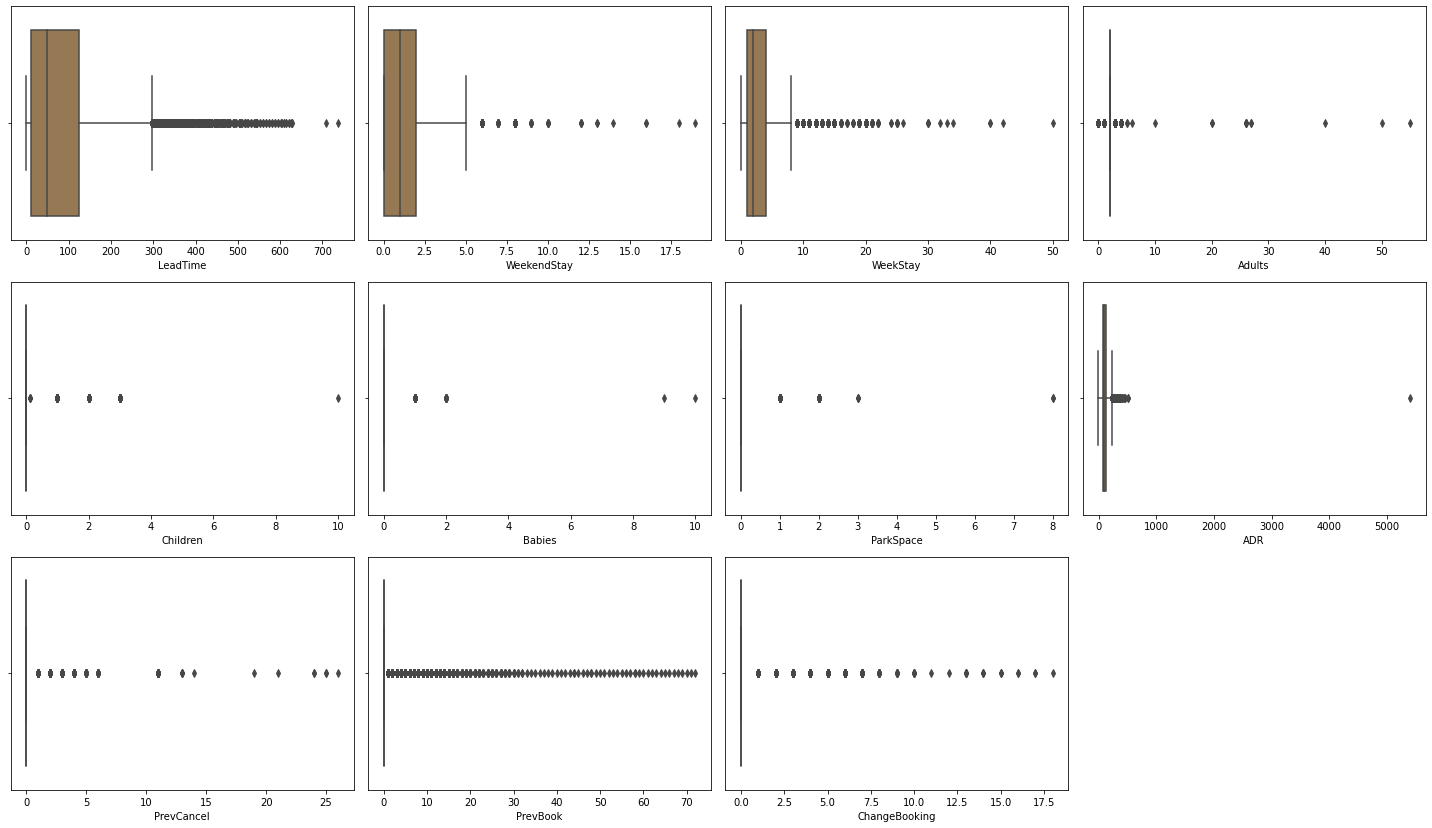

In [ ]:
columns = ['LeadTime', 'WeekendStay', 'WeekStay', 'Adults', 'Children', 'Babies', 'ParkSpace', 'ADR', 'PrevCancel', 'PrevBook', 'ChangeBooking']
n = 1
plt.figure(figsize=(20,15))

for i in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(data_f[i],palette='cubehelix')
  plt.tight_layout()

Here, We can se there are so many outliers in  all the columns so we can remove all the outliers using conditions.

In [ ]:
data_f.loc[data_f.LeadTime > 300, 'LeadTime'] = 300
data_f.loc[data_f.WeekendStay >=  5, 'WeekendStay'] = 5
data_f.loc[data_f.Adults > 4, 'Adults'] = 4
data_f.loc[data_f.PrevBook > 0, 'PrevBook'] = 1
data_f.loc[data_f.PrevCancel > 0, 'PrevCancel'] = 1
data_f.loc[data_f.WeekStay > 10, 'WeekStay'] = 10
data_f.loc[data_f.ChangeBooking > 5, 'ChangeBooking'] = 5
data_f.loc[data_f.Babies > 8, 'Babies'] = 0
data_f.loc[data_f.ParkSpace > 5, 'ParkSpace'] = 0
data_f.loc[data_f.Children > 8, 'Children'] = 0
data_f.loc[data_f.ADR > 500, 'ADR'] = 1000

All the outliers are removed from the dataset now, our dataset is clean.

<h1>EDA and Visualization<h1>

In [ ]:
data_f['Total_member']=data_f['Adults']+data_f['Children']
numric_data= data_f[['LeadTime','PrevCancel','PrevBook','ChangeBooking','WaitingDays','ADR','ParkSpace','SpecialRequest','Total_member']]


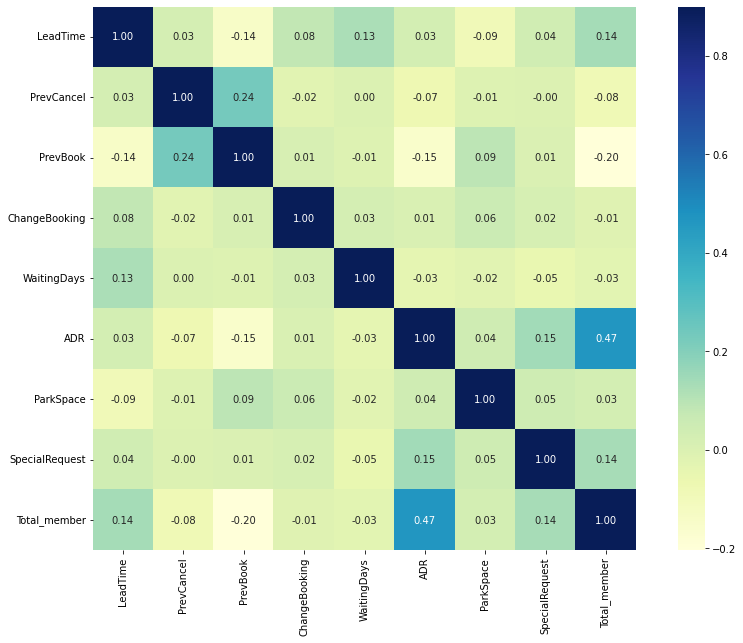

In [ ]:
#correlation 
correlation = numric_data.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.9, square=True,cmap="YlGnBu");

In [ ]:
# Q-1 which is the most visited country by the visitor 
top_visited_country=data_f.Country.value_counts().head(3)
top_visited_country

# In this code we can see the percentage of the visitor are visited the countrys

# top_visited_country_percentage=data_f.Country.value_counts(normalize=True)
# top_visited_country_percentage

PRT    27355
GBR    10424
FRA     8823
Name: Country, dtype: int64

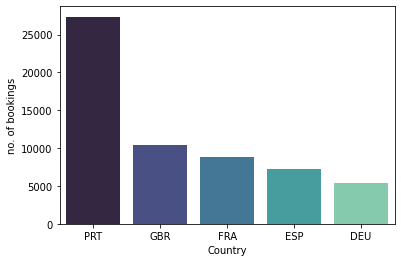

In [ ]:
grp_by_country = data_f.groupby('Country')
data = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
data = data[:5]
sns.barplot(x = data.index, y = data['no. of bookings'],palette='mako')
plt.show()

Here,We can see that

*  'PRT'(Portugal )has the highest no of visitor (27355) and 
*  'GBR'(Great Britain) has the second highest no of the visitor(10424) then comes the 'FRA'(France) with the third highest no of the visitors(8823)



In [ ]:
# graphically representation of booking data by the country of origin

visitors_country = data_f[data_f['Canceled'] == '0'].groupby(['Country']).size().reset_index(name = 'count')
px.choropleth(visitors_country, locations = "Country",color= "count",hover_name= "Country",color_continuous_scale=px.colors.sequential.Tealgrn,title="Visitor's Home Countrys")

large number of hotel booker are from the UK.
the highest numbers of bookings originating from Portugal and France.

In [ ]:
# Q-2 In which month the highest reservations are done?
Highest_reservation_month=data_f.ArrivingMonth.value_counts()
Highest_reservation_month

# In this code we can see the percentage of the visitor are visited the countrys
# Highest_reservation_month_percentage=data_f.ArrivingMonth.value_counts(normalize=True)
# Highest_reservation_month_percentage

August       11242
July         10043
May           8344
April         7900
June          7756
March         7489
October       6921
September     6682
February      6083
December      5112
November      4973
January       4685
Name: ArrivingMonth, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



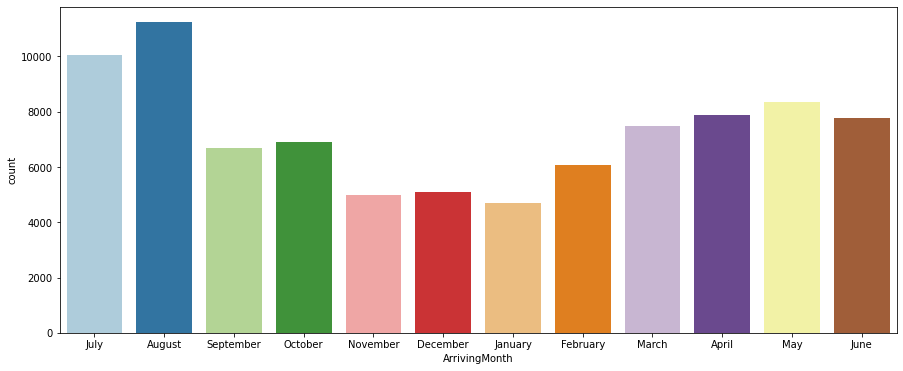

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data_f['ArrivingMonth'], palette='Paired')
plt.show()

August is the highest reservation month (11242) meanwhile the lowest reservation month is january(4685)

In [ ]:
# Q-3 which is the most populor meal ordered by the visitors?

most_popular_meal=data_f.Meal.value_counts()
most_popular_meal

BB           67907
SC            9391
HB            9080
Undefined      492
FB             360
Name: Meal, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



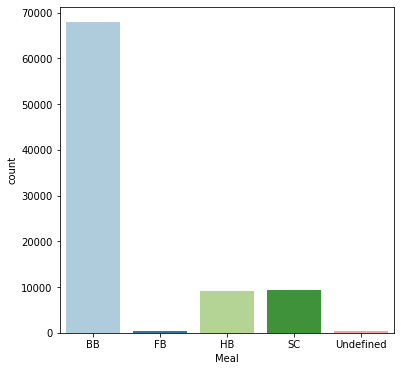

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data_f['Meal'], palette='Paired')
plt.show()

BB is the most popular meal ordered by the visitor(67907)

In [ ]:
# Q-4 In which type of hotel the reservation is highest? (A) City hotel (B) Resort hotel
hotel_type_reservation=data_f.Hotel.value_counts()
hotel_type_reservation

City Hotel      53274
Resort Hotel    33956
Name: Hotel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



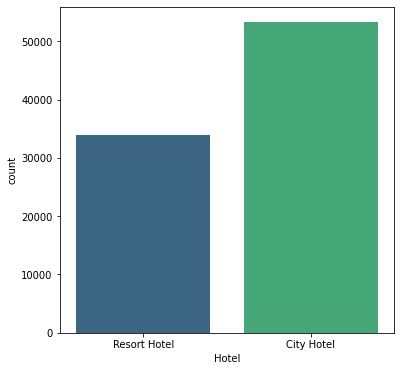

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data_f['Hotel'], palette='viridis')
plt.show()

The reservation is highest in the City hotel 

In [ ]:
# Q-5 To check the average cancellation booking of the year 2015,2016,2017. (1 is represented as the  canceled booking therefore, 0 represented as the  not-canceled booking)
canceled_booking=data_f.Canceled.value_counts()
canceled_booking

0    63221
1    24009
Name: Canceled, dtype: int64

In [ ]:
canceled_booking_percentage=data_f.Canceled.value_counts(normalize=True)
canceled_booking_percentage

0    0.724762
1    0.275238
Name: Canceled, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



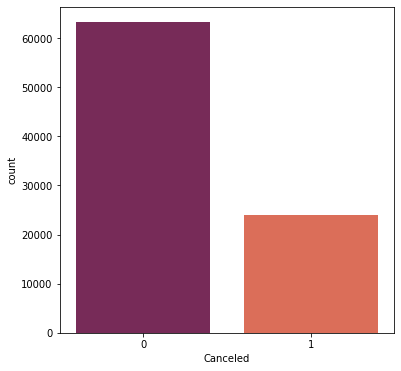

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data_f['Canceled'], palette='rocket')
plt.show()

Here,We can see the 72.4% booking were not canceled and 27.5% booking have canceled 

In [ ]:
# Q-5 what is the cancellation rate between city and resort hotel?
cancellation=['Canceled','Hotel']
hotel_type_canceled=data_f[cancellation]
Canceled_hotel=hotel_type_canceled[hotel_type_canceled['Canceled']=='1'].groupby(['Hotel']).size().reset_index(name='count')

Text(0.5, 1.0, 'Highest Cancellation between city and resort hotel')

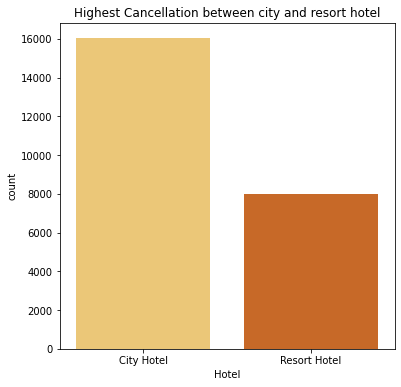

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(data = Canceled_hotel, x = 'Hotel', y = 'count',palette='YlOrBr').set_title('Highest Cancellation between city and resort hotel')

The highest cancelation rate is found in City Hotel and Highest booking is also found in City Hotel.

In [ ]:
# Q-6 To check if the guest are Repeated or not (if guest is repeated (1) and if guest is not repeated(0))

repeated_guest=data_f.RepeatGuest.value_counts()
repeated_guest

0    83866
1     3364
Name: RepeatGuest, dtype: int64

In [ ]:
repeated_guest_percentage=data_f.RepeatGuest.value_counts(normalize=True)
repeated_guest_percentage

0    0.961435
1    0.038565
Name: RepeatGuest, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



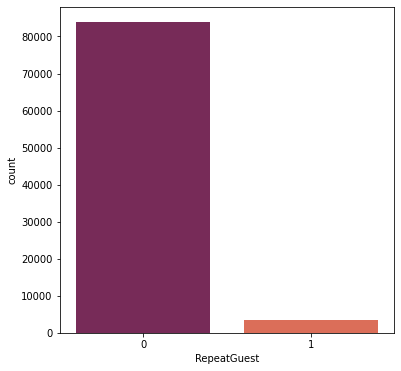

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data_f['RepeatGuest'], palette='rocket')
plt.show()

The number of repeated guests is too low.

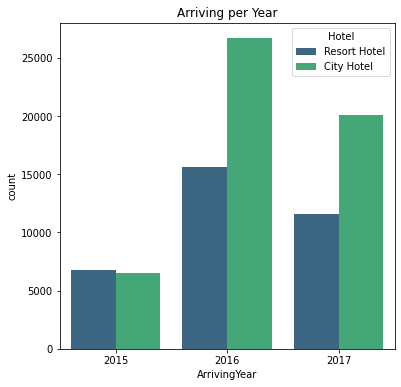

In [ ]:
# Q-7 In the following years 2015,2016,2017 when the hotel is mostly booked by the visitors

data=['Hotel','ArrivingYear','ArrivingMonth','ArrivingDate']
timing_of_arriving=data_f[data]
plt.figure(figsize=(6,6))
sns.countplot(data=timing_of_arriving,x='ArrivingYear',hue='Hotel',palette='viridis').set_title('Arriving per Year')
plt.show()

Here,we can see the visitors most of time were arrived in the year of 2016 and 2017 city hotel.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



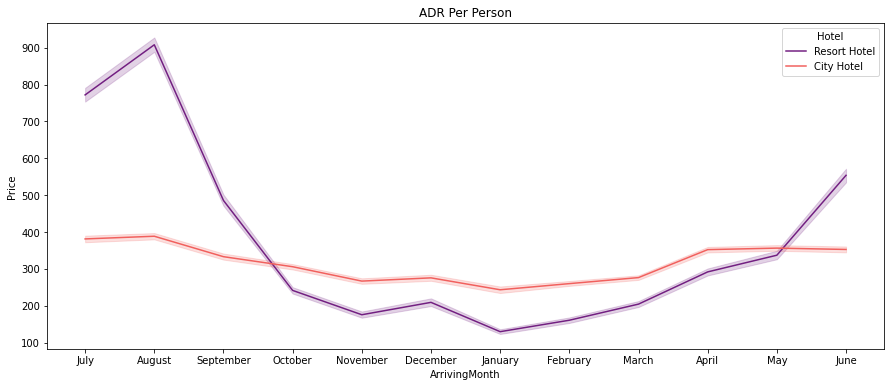

In [ ]:
# Q-8 calculatet the ADR per person?
data_f['ADR_PP']=data_f['ADR']/(data_f['Total_member'])
guests=data_f.loc[data_f['Canceled']=="0"]
guests['Price']=guests['ADR']*(guests['WeekendStay']+guests['WeekStay'])
plt.figure(figsize=(15,6))
sns.lineplot(data = guests, x = 'ArrivingMonth', y = 'Price', hue = 'Hotel',palette="magma").set_title('ADR Per Person')
plt.show()

Here,we can see that the resort hotel price is more then the city hotel


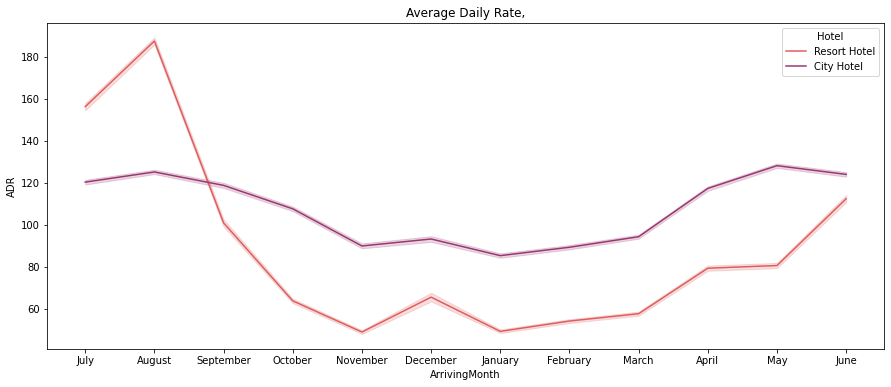

In [ ]:
# Q-9 find the ADR 
plt.figure(figsize=(15,6))
sns.lineplot(data= data_f,x='ArrivingMonth', y='ADR', hue='Hotel',palette="flare").set_title('Average Daily Rate,')
plt.show()


Text(0.5, 1.0, 'Average Daily Rate,')

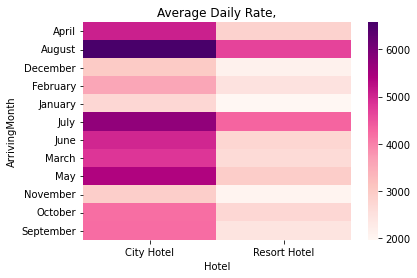

In [ ]:
sns.heatmap(pd.crosstab(data_f.ArrivingMonth,data_f.Hotel),cmap="RdPu").set_title('Average Daily Rate,')

*   City hotel: the ADR is more costly during the month of august,july, may, june.
*   Resort Hotel: the ADR is more costly in during the month of  august,july, june




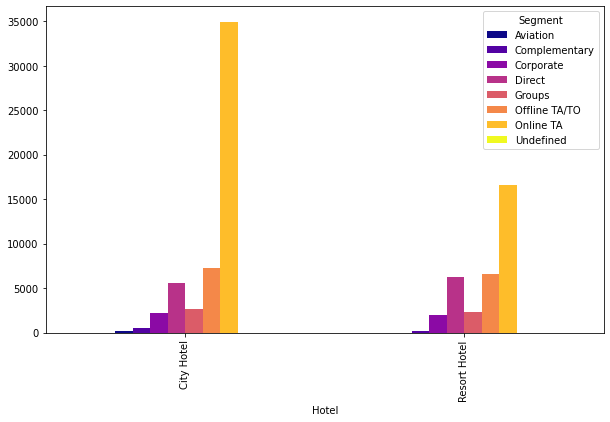

In [ ]:
# check the visitors coming from which segment?
segment=data_f.groupby(['Hotel','Segment']).size()
segment=segment.unstack()
segment.plot(kind='bar',figsize=(10,6),cmap="plasma")


Most of the visitor are coming from Online TA in City hotel and Resort hotel

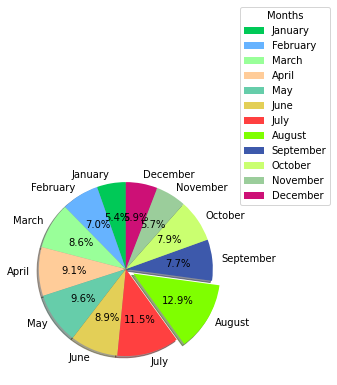

In [ ]:
# check the highest Avrage daily rate months in 2016?
months=[]
adr=[]
# data_f.loc[data_f['ArrivingYear']=='2016'].ArrivingMonth.unique()
for month in data_f.loc[data_f['ArrivingYear']=='2016'].ArrivingMonth.unique():
  months.append(month)
  if month==month:
    month=data_f[data_f['ArrivingMonth']==month].ADR.count()
    adr.append(month)

y = np.array([4685, 6083, 7489, 7900, 8344, 7756, 10043, 11242, 6682, 6921, 4973, 5112])
labels = ['January', 'February','March','April','May','June','July','August','September', 'October','November','December']
colors = ['#00C957','#66b3ff','#99ff99','#ffcc99','#66CDAA','#E3CF57','#FF4040','#7FFF00','#3D59AB','#CAFF70','#9BCD9B','#CD1076']
explode = (0, 0, 0, 0,0,0,0,0.1,0,0,0,0)
plt.pie(y, labels =labels, explode=explode,autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
plt.legend(  title="Months",loc="center left",bbox_to_anchor=(1, 0, 2, 2.5))
plt.show() 


Highest average daily rate month in 2016 is August

.,<h1>Summary of dataset of Hotel booking <h1>

* 'PRT'(Portugal )has the highest no of visitor (27355) while
  'GBR'(Great Britain) has the second highest no of the visitor(10424) and 'FRA'(France)has the third highest no of the visitors(8823)

* August is the highest reservation month (11242) meanwhile the lowest reservation month is january(4685)

* BB is the most popular meal ordered by the visitor(67907)

* City Hotel have the Highest reservation by the visitors as compare to Resort Hotel

* The 72.4% booking were not canceled and 27.5% booking have been canceled

* The highest cancelation rate was found in City Hotel and Highest booking was also found in City Hotel.

* The bare minimum number of the guests were repeated

* Most of time the visitors were arrived in the year of 2016 and 2017 in the city hotel.

* The maximum of visitors like city Hotels.

* The prices for resort hotels were higher and fluctuate more than city hotels.

* City hotel: the ADR was more costly during the month of july,august, may, june;
Resort Hotel: the ADR was more costly in during the month of july, august, june

* Most of the visitor are coming from Online TA in City hotel and Resort hotel
* Highest average daily rate month in 2016 is August

